In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/MusicNotebook/

/content/drive/MyDrive/MusicNotebook


In [ ]:
!apt-get install swig

In [ ]:
!git clone https://github.com/louisabraham/python3-midi.git

fatal: destination path 'python3-midi' already exists and is not an empty directory.


In [ ]:
cd python3-midi/

/content/drive/My Drive/MusicNotebook/python3-midi


In [ ]:
!python setup.py install

/usr/local/lib/python2.7/dist-packages/setuptools/dist.py:476: UserWarning: Normalizing 'v0.2.3' to '0.2.3'
  normalized_version,
running install
running build_ext
running build
running build_py
running build_scripts
changing mode of build/scripts-2.7/mididump.py from 600 to 755
changing mode of build/scripts-2.7/mididumphw.py from 600 to 755
changing mode of build/scripts-2.7/midiplay.py from 600 to 755
running install_lib
creating /usr/local/lib/python2.7/dist-packages/midi
copying build/lib.linux-x86_64-2.7/midi/constants.py -> /usr/local/lib/python2.7/dist-packages/midi
copying build/lib.linux-x86_64-2.7/midi/events.py -> /usr/local/lib/python2.7/dist-packages/midi
copying build/lib.linux-x86_64-2.7/midi/fileio.py -> /usr/local/lib/python2.7/dist-packages/midi
copying build/lib.linux-x86_64-2.7/midi/util.py -> /usr/local/lib/python2.7/dist-packages/midi
copying build/lib.linux-x86_64-2.7/midi/containers.py -> /usr/local/lib/python2.7/dist-packages/midi
copying build/lib.linux-x86_6

In [ ]:
cd ../

/content/drive/My Drive/MusicNotebook


In [ ]:
!pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 34kB/s 
     |████████████████████████████████| 3.8MB 51.9MB/s 
     |████████████████████████████████| 512kB 35.1MB/s 
  Found existing installation: tensorboard 2.1.0
    Uninstalling tensorboard-2.1.0:
      Successfully uninstalled tensorboard-2.1.0
  Found existing installation: tensorflow-estimator 1.15.0
    Uninstalling tensorflow-estimator-1.15.0:
      Successfully uninstalled tensorflow-estimator-1.15.0
  Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0


In [ ]:
tf.__version__

'1.15.0'

In [ ]:
!pip install statistics

In [ ]:
import numpy as np
import pandas as pd
import msgpack
import glob
import tensorflow as tf
from tensorflow.python.ops import control_flow_ops
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

import midi_manipulation


%matplotlib inline

W0410 20:22:40.569314 140129655117696 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/tensorflow_estimator/python/estimator/api/_v1/estimator/__init__.py:12: The name tf.estimator.inputs is deprecated. Please use tf.compat.v1.estimator.inputs instead.



In [ ]:
def get_songs(path):
    files = glob.glob('{}/*.mid*'.format(path))
    print(files)
    songs = []
    for f in tqdm(files):
        print(f)
        song = np.array(midi_manipulation.midiToNoteStateMatrix(f))
        if np.array(song).shape[0] > 50:
             songs.append(song)
             print('gottcha')
        else:
             print(np.array(song).shape[0], 'no good')   
    return songs

In [ ]:
songs = get_songs('/content/drive/MyDrive/mozart/') #These songs have already been converted from midi to msgpack
print("{} songs processed".format(len(songs)))

  0%|          | 0/7 [00:00<?, ?it/s]

['/content/drive/MyDrive/mozart/mz570.mid', '/content/drive/MyDrive/mozart/mz545.mid', '/content/drive/MyDrive/mozart/mz333.mid', '/content/drive/MyDrive/mozart/mz332.mid', '/content/drive/MyDrive/mozart/mz331.mid', '/content/drive/MyDrive/mozart/mz330.mid', '/content/drive/MyDrive/mozart/mz311.mid']
/content/drive/MyDrive/mozart/mz570.mid


 14%|█▍        | 1/7 [00:01<00:06,  1.02s/it]

(1, 'no good')
/content/drive/MyDrive/mozart/mz545.mid


 29%|██▊       | 2/7 [00:02<00:05,  1.19s/it]

gottcha
/content/drive/MyDrive/mozart/mz333.mid


 43%|████▎     | 3/7 [00:05<00:06,  1.58s/it]

gottcha
/content/drive/MyDrive/mozart/mz332.mid


 57%|█████▋    | 4/7 [00:05<00:04,  1.35s/it]

(1, 'no good')
/content/drive/MyDrive/mozart/mz331.mid


 71%|███████▏  | 5/7 [00:06<00:02,  1.20s/it]

(1, 'no good')
/content/drive/MyDrive/mozart/mz330.mid


 86%|████████▌ | 6/7 [00:08<00:01,  1.31s/it]

gottcha
/content/drive/MyDrive/mozart/mz311.mid


100%|██████████| 7/7 [00:10<00:00,  1.59s/it]

gottcha
4 songs processed


In [ ]:
lowest_note = midi_manipulation.lowerBound #the index of the lowest note on the piano roll
highest_note = midi_manipulation.upperBound #the index of the highest note on the piano roll
note_range = highest_note-lowest_note #the note range

num_timesteps  = 4 #64 #32 #16 #This is the number of timesteps that we will create at a time  (16 = one bar)
n_visible      = 2*note_range*num_timesteps #This is the size of the visible layer. 
n_hidden       = 500 #50 #This is the size of the hidden layer

In [ ]:
#x  = tf.placeholder(tf.float32, [None, n_visible], name="x") #The placeholder variable that holds our data
#W  = tf.Variable(tf.random_normal([n_visible, n_hidden], 0.01), name="W") #The weight matrix that stores the edge weights
#bh = tf.Variable(tf.zeros([1, n_hidden],  tf.float32, name="bh")) #The bias vector for the hidden layer
#bv = tf.Variable(tf.zeros([1, n_visible],  tf.float32, name="bv")) #The bias vector for the visible layer

In [ ]:
z_dim = n_hidden #100
X_dim = n_visible #mnist.train.images.shape[1]
h_dim = n_hidden #128


In [ ]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

In [ ]:
X = tf.placeholder(tf.float32, shape=[None, X_dim], name="X")
z = tf.placeholder(tf.float32, shape=[None, z_dim], name="z")

Q_b1 = tf.Variable(tf.zeros(shape=[h_dim]), name="Q_b1")
Q_W1 = tf.Variable(xavier_init([X_dim, h_dim]), name="Q_W1")

Q_W2_mu = tf.Variable(xavier_init([h_dim, z_dim]), name="Q_W2_mu")
Q_b2_mu = tf.Variable(tf.zeros(shape=[z_dim]), name="Q_b2_mu")

Q_W2_sigma = tf.Variable(xavier_init([h_dim, z_dim]),name="Q_W2_sigma")
Q_b2_sigma = tf.Variable(tf.zeros(shape=[z_dim]),name="Q_b2_sigma")

In [ ]:
def Q(X):
    h = tf.nn.relu(tf.matmul(X, Q_W1) + Q_b1)
    z_mu = tf.matmul(h, Q_W2_mu) + Q_b2_mu
    z_logvar = tf.matmul(h, Q_W2_sigma) + Q_b2_sigma
    return z_mu, z_logvar


def sample_z(mu, log_var):
    eps = tf.random_normal(shape=tf.shape(mu))
    return mu + tf.exp(log_var / 2) * eps

In [ ]:
# =============================== P(X|z) ======================================

P_W1 = tf.Variable(xavier_init([z_dim, h_dim]), name="P_W1")
P_b1 = tf.Variable(tf.zeros(shape=[h_dim]), name="P_b1")

P_b2 = tf.Variable(tf.zeros(shape=[X_dim]), name="P_b2")
P_W2 = tf.Variable(xavier_init([h_dim, X_dim]), name="P_W2")



def P(z):
    h = tf.nn.relu(tf.matmul(z, P_W1) + P_b1)
    logits = tf.matmul(h, P_W2) + P_b2
    prob = tf.nn.sigmoid(logits)
    return prob, logits

In [ ]:
z_mu, z_logvar = Q(X)
z_sample = sample_z(z_mu, z_logvar)
_, logits = P(z_sample)

# Sampling from random z
X_samples, _ = P(z)

# E[log P(X|z)]
recon_loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=X), 1)
# D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
kl_loss = 0.5 * tf.reduce_sum(tf.exp(z_logvar) + z_mu**2 - 1. - z_logvar, 1)
# VAE loss
vae_loss = tf.reduce_mean(recon_loss + kl_loss)

solver = tf.train.AdamOptimizer().minimize(vae_loss) #check learning rate

#saver = tf.train.Saver()

W0410 20:24:31.334772 140129655117696 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

if not os.path.exists('out/'):
    os.makedirs('out/')

In [ ]:
num_epochs = 25000 #The number of training epochs that we are going to run. For each epoch we go through the entire data set.
batch_size = 100 #The number of training examples that we are going to send through the model at a time. 
# lr         = tf.constant(0.005, tf.float32) #The learning rate of our model

i = 0
loss_value = np.array([])
iter_value = np.array([])
songs = [songs[0]]
while i <= num_epochs:
    for song in songs:
        # The songs are stored in a time x notes format. The size of each song is timesteps_in_song x 2*note_range
        # Here we reshape the songs so that each training example is a vector with num_timesteps x 2*note_range elements
        song = np.array(song)
        song = song[:np.floor(song.shape[0]/num_timesteps).astype(int)*num_timesteps]
        song = np.reshape(song, [int(song.shape[0]/num_timesteps), song.shape[1]*num_timesteps])
        
        # Train the VAE on batch_size examples at a time
        for ind in range(0, len(song), batch_size): 
            X_mb = song[ind:ind+batch_size]
            _, loss = sess.run([solver, vae_loss], feed_dict={X: X_mb})
            
        
        
        

    
    if i % 100 == 0:
        print('Iter: {}'.format(i))
        print('Loss: {:.4}'. format(loss))
        iter_value = np.append(iter_value, i)
            
        loss_value = np.append(loss_value, loss)

        print(iter_value)
        print(loss_value)
        plt.figure()
 
        
    if i % 1000 == 0:
        samples = sess.run(X_samples, feed_dict={z: np.random.randn(1,z_dim)})
        S = np.reshape(samples, (num_timesteps, 2*note_range))
        thresh_S = S>=0.5
        plt.figure(figsize=(12,2))
        plt.subplot(1,2,1)
        plt.imshow(S)
        plt.subplot(1,2,2)
        plt.imshow(thresh_S)
        plt.tight_layout()
        plt.pause(0.1)
        #midi_manipulation.noteStateMatrixToMidi(thresh_S, "out/generated_chord_{}".format(i))
#                 print(i)
        plt.plot(iter_value, loss_value, 'o-')
        
        plt.show() 
        
    i += 1

In [ ]:
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer

In [ ]:
x_samp = iter_value
y_samp = loss_value

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


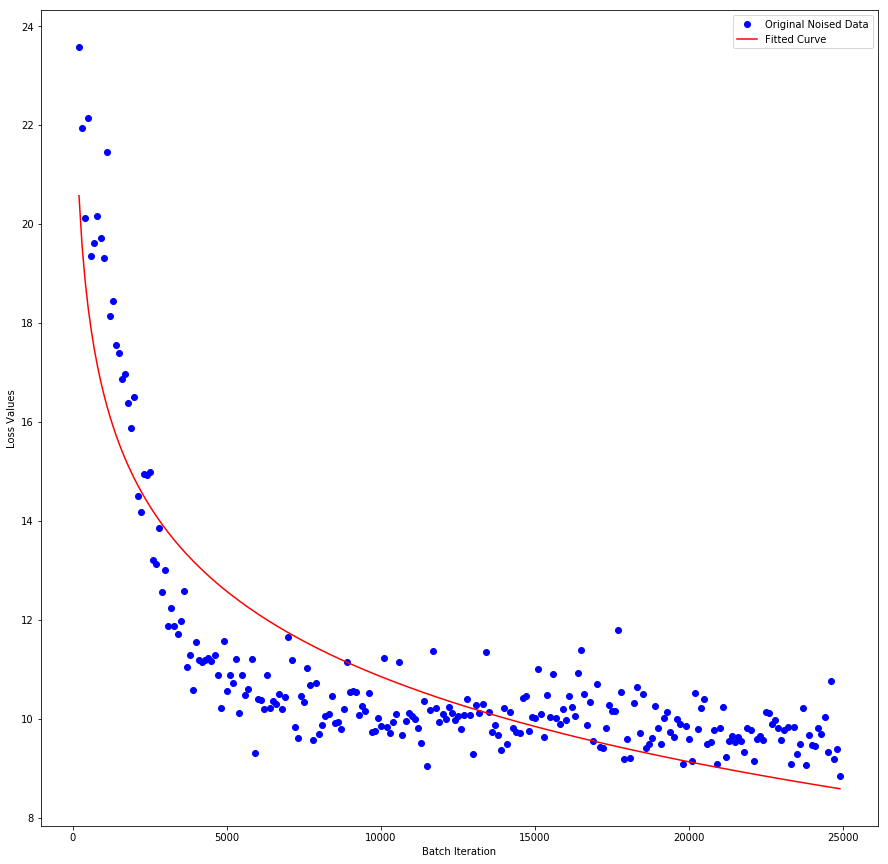

In [ ]:
def func(x_samp, a, b, c):
  #return a * np.exp(-b * x) + c
  return a * np.log(b * x_samp) + c


yn = y_samp + 0.2*np.random.normal(size=len(x_samp))

popt, pcov = curve_fit(func, x_samp, yn)


plt.figure(figsize=(15, 15))
plt.plot(x_samp, yn, 'bo', label="Original Noised Data")
plt.plot(x_samp, func(x_samp, *popt), 'r-', label="Fitted Curve")
plt.xlabel("Batch Iteration")
plt.ylabel("Loss Values")
plt.legend()
plt.show()

In [ ]:
import statistics
def variance(data):
  n = len(data)
  mean = sum(data) / n
  deviations = [(x - mean) ** 2 for x in data]
  variance = sum(deviations) / n
  return variance


In [ ]:
statistics.stdev(loss_value)

2.5935314236520295

In [ ]:
saver = tf.train.Saver()

#Save just in case
mname = 'model'+'_h'+str(n_hidden)+'nt'+str(num_timesteps)
save_path = saver.save(sess, "./tmp/"+mname+".ckpt")
print("Model saved in path: %s" % save_path)

Model saved in path: ./tmp/model_h600nt4.ckpt


## Training Ended
# Generative Part Starts Here

In [ ]:
#tf.reset_default_graph()
#imported_graph = tf.train.import_meta_graph("./tmp/"+mname+".ckpt.meta")

#saver = tf.train.Saver()
#restore_path = saver.restore(sess, "./tmp/"+mname+".ckpt")

#sess = tf.Session()
#imported_graph.restore(sess, tf.train.latest_checkpoint("./tmp/")
#imported_graph.restore(sess, "./tmp/"+mname+".ckpt")

In [ ]:
bars = int(25*16/num_timesteps)
print(bars, z_dim)
samples = sess.run(X_samples, feed_dict={z: np.random.randn(bars,z_dim)})
S = np.reshape(samples, (bars*num_timesteps, 2*note_range))
thresh_S = S>=0.7 #0.5
midi_manipulation.noteStateMatrixToMidi(thresh_S, "out/generated_chord_long")

(100, 600)


(1345, 156)


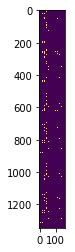

In [ ]:
vn = 3
q = "/content/drive/MyDrive/haydn/haydn3"+".mid"
# q = "/content/drive/MyDrive/naruto/n2.mid"
querysong = np.array(midi_manipulation.midiToNoteStateMatrix(q))
print(np.shape(querysong))
plt.imshow(querysong)

In [ ]:
song = np.array(querysong)
zeropadsong = np.zeros(((np.floor(song.shape[0]/num_timesteps).astype(int)+1)*num_timesteps, song.shape[1]))
zeropadsong[:song.shape[0],:song.shape[1]] = song
#song = song[:(np.floor(song.shape[0]/num_timesteps).astype(int)+1)*num_timesteps]
song = np.reshape(zeropadsong, [int(song.shape[0]/num_timesteps)+1, song.shape[1]*num_timesteps])
print(np.shape(song))

decode_bars = np.shape(song)[0]
S_reconstruct = np.reshape(song, (decode_bars*num_timesteps, 2*note_range))

midi_manipulation.noteStateMatrixToMidi(S_reconstruct, "out/song_reconstruct"+"_vf"+str(vn))   

(337, 624)


In [ ]:
# Encode the VAE on query
# These are the functions for Encoding-Decoding
# Encoding: Reading from Data to get z_sample
#z_mu, z_logvar = Q(X)
#z_sample = sample_z(z_mu, z_logvar)
# Decoding: Sampling from z
#X_samples, _ = P(z)

Xq = song
zs = True
if zs:
    zq_sample = sess.run(z_sample, feed_dict={X: Xq})
    ztype = "_zs"
else: #using the mean instead of sampling: 
    zq_sample = sess.run(z_mu, feed_dict={X: Xq})  #Check why this causes breaks / missing values in the output
    ztype = "_zmu"
print(np.shape(zq_sample))

(337, 600)


In [ ]:
# Decode with the z from query
samples = sess.run(X_samples, feed_dict={z: zq_sample})

S = np.reshape(samples, (decode_bars*num_timesteps, 2*note_range))
thresh_S = S>=0.66 #0.857 #0.5
fout = "generated_query"+'_h'+str(n_hidden)+'_nt'+str(num_timesteps)+str(ztype)+"_vf"+str(vn)
print(fout)
midi_manipulation.noteStateMatrixToMidi(thresh_S, "out/"+fout)    

generated_query_h600_nt4_zs_vf3


(337, 600)


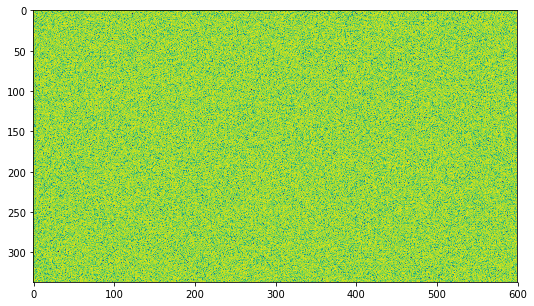

In [ ]:
plt.figure(figsize=(18,5))
plt.imshow(np.log(np.abs(zq_sample)))
print(np.shape(zq_sample))